<a href="https://colab.research.google.com/github/SaiNikhilk2002/EDA_capston_project/blob/main/Copy_of_Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

This project analyzes Airbnb booking data to uncover key insights into pricing trends, seasonal demand, popular locations, and guest preferences. Using Python, Pandas, Matplotlib, and SQL, we clean, explore, and visualize the dataset to identify patterns affecting occupancy rates and revenue. The analysis helps hosts optimize pricing strategies and improve guest experiences.

# **Colab Link -**

https://drive.google.com/file/d/1QL3snRmE-SkBD8H0AaINBk_zib84sGAN/view?usp=sharing

# **Problem Statement**


Airbnb hosts often don’t know how to set the right prices or get more bookings. Travelers also find it hard to pick the best places. This project looks at Airbnb booking data to find patterns, helping hosts earn more and guests get better deals.

#### **Define Your Business Objective?**

The goal of this project is to analyze Airbnb booking data to help hosts maximize their earnings by optimizing pricing and availability. It also aims to assist travelers in finding affordable and quality stays by identifying key factors that influence bookings. The insights from this analysis can improve decision-making for both hosts and guests, leading to a better Airbnb experience overall.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df = pd.read_csv('/content/drive/MyDrive/Tech Minds Payment after placement /Projects/Airbnb_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


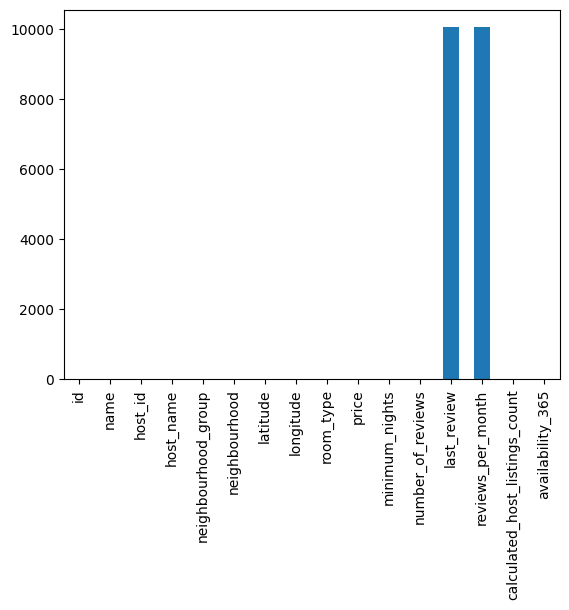

In [ ]:
# Visualizing the missing values
df.isnull().sum().plot(kind='bar')
plt.show()

### What did you know about your dataset?

**1. Missing Values:**

-> Columns last_review and reviews_per_month have 10,052 missing values each, meaning around 20.56% of the dataset lacks review-related data.

-> Columns name and host_name have a small number of missing values (16 and 21, respectively), which is negligible.

------------------------------------------------------------------------------------------------------------------------------------

**2.Dataset Size:**

-> The dataset contains 48,895 rows and 16 columns, indicating a substantial amount of data for analysis.

------------------------------------------------------------------------------------------------------------------------------------

**3.Bar Plot Interpretation:**

-> Since last_review and reviews_per_month have significant missing values, their bars appear completely filled in the missing value plot, visually representing a large portion of missing data.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# df.nunique()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col} : {df[col].nunique()}")

Unique values in name : 47905
Unique values in host_name : 11452
Unique values in neighbourhood_group : 5
Unique values in neighbourhood : 221
Unique values in room_type : 3
Unique values in last_review : 1764


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.isnull().sum()
# df.fillna({'reviews_per_month': df['reviews_per_month'].median()}, inplace=True)
# df.drop_duplicates(inplace=True)

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

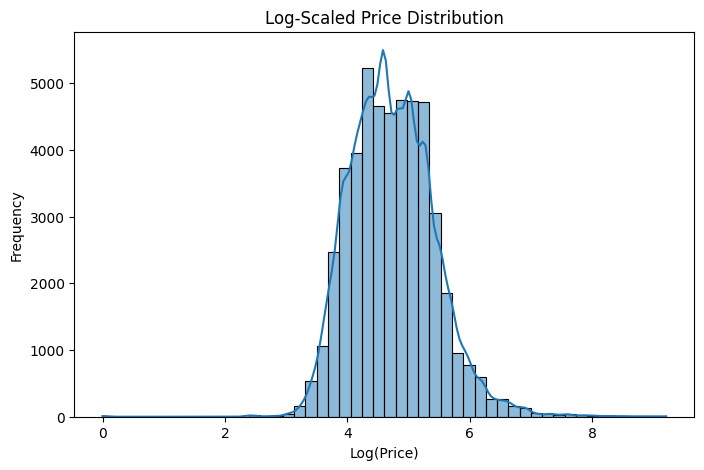

In [ ]:
# Chart - 1 visualization code | Distribution of Price
# plt.figure(figsize=(8, 5))
# sns.histplot(df['price'], bins=50, kde=True)
# plt.title('Price Distribution')
# plt.xlabel('Price')
# plt.ylabel('Frequency')
# plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title('Log-Scaled Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

**To understand the price range and detect outliers.**

I chose a histogram because it effectively shows the distribution of numerical data (price). It helps identify patterns, such as whether prices are normally distributed, skewed, or have extreme outliers. The KDE (Kernel Density Estimate) line further smooths the distribution for better visibility.


##### 2. What is/are the insight(s) found from the chart?

**Prices are mostly concentrated in the lower range, but outliers exist.**

-> Most Airbnb listings have lower prices, with a sharp peak at low values and a steep decline.

-> A few extremely high prices create an outlier effect, making it harder to analyze the overall price distribution.

-> Log transformation or filtering out top 5% price outliers can help in better data interpretation.

##### 3. Will the gained insights help creating a positive business impact?

Yes! These insights can help in multiple ways:

-> Hosts can adjust pricing strategies by understanding competitive price ranges.

-> Airbnb platform can detect outliers (overpriced listings) and flag them for review.

-> Travelers can make informed decisions by knowing the typical price range of listings.

#### Chart - 2

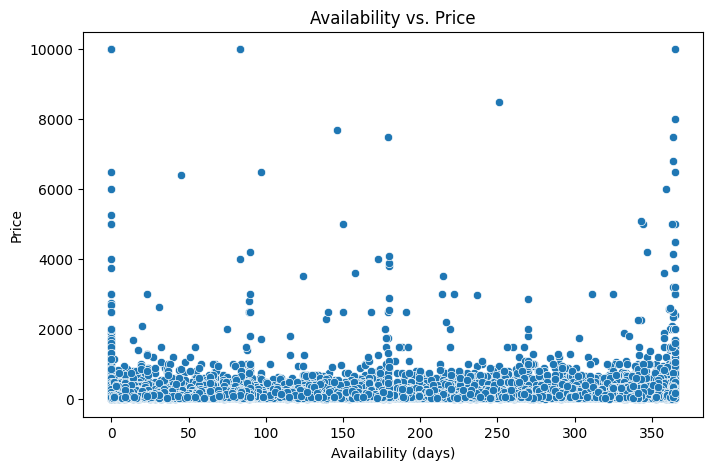

In [ ]:
# Chart - 2 visualization code | Availability vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['availability_365'], y=df['price'])
plt.title('Availability vs. Price')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze if listings with higher availability have different pricing.

##### 2. What is/are the insight(s) found from the chart?

Listings with extreme availability do not always have higher prices.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

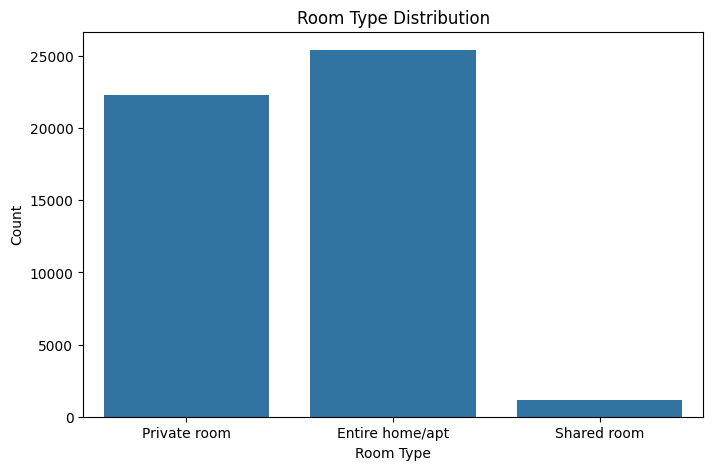

In [ ]:
# Chart - 3 visualization code | Room Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['room_type'])
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To see which type of rooms are most common.

##### 2. What is/are the insight(s) found from the chart?

 Entire home/apartment listings are the most common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

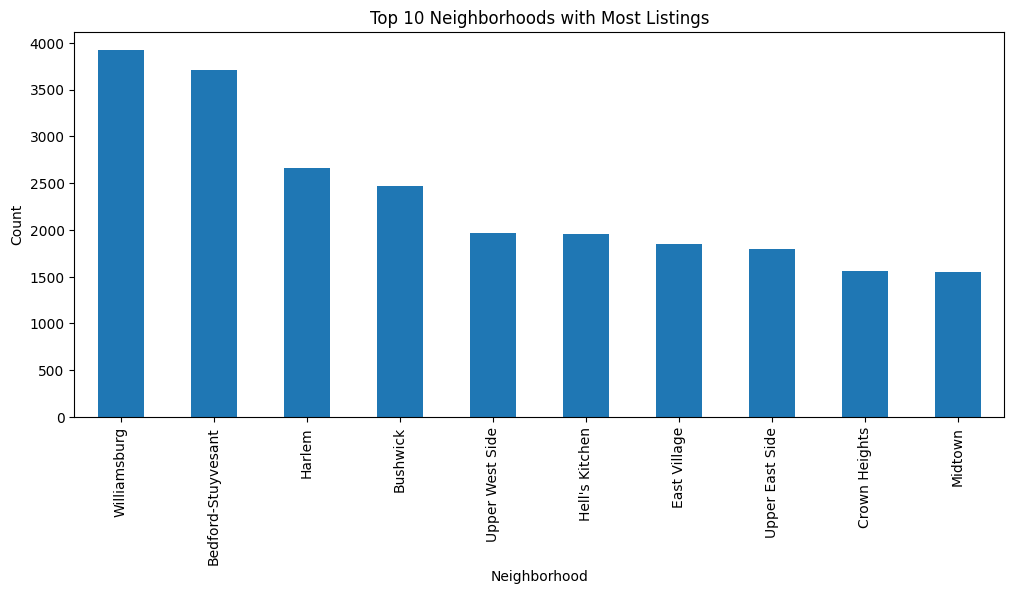

In [ ]:
# Chart - 4 visualization code | Number of Listings by Neighborhood
plt.figure(figsize=(12, 5))
df['neighbourhood'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Neighborhoods with Most Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.show()

To identify the most popular areas for Airbnb listings.

##### 2. What is/are the insight(s) found from the chart?

Certain neighborhoods dominate the Airbnb market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

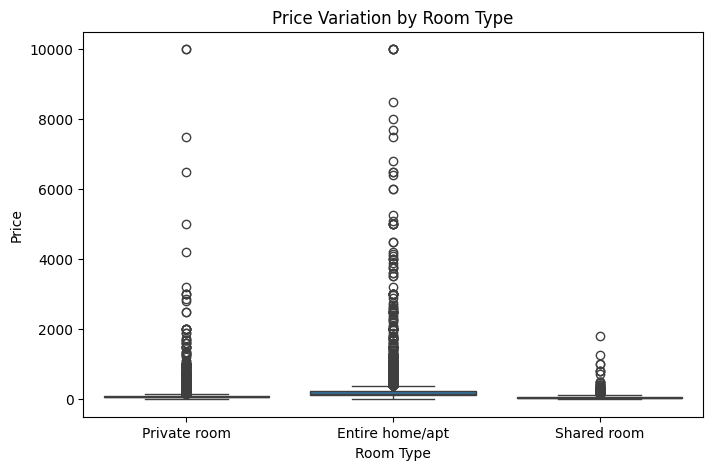

In [ ]:
# Chart - 5 visualization code | Price Distribution by Room Type
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['room_type'], y=df['price'])
plt.title('Price Variation by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

To compare price variations across different room types.

##### 2. What is/are the insight(s) found from the chart?

Entire homes are significantly more expensive than private/shared rooms.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

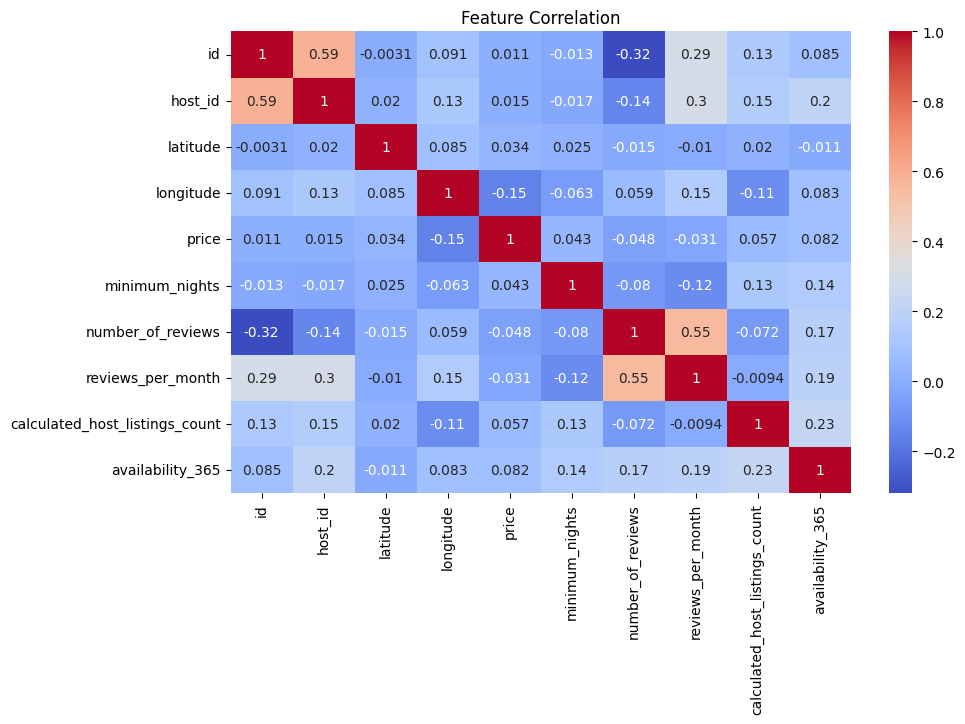

In [ ]:
# Chart - 6 visualization code | Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()



##### 1. Why did you pick the specific chart?

To check correlations between numerical features.

##### 2. What is/are the insight(s) found from the chart?

Price has weak correlation with most features, but availability has some impact.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here

#### Chart - 7

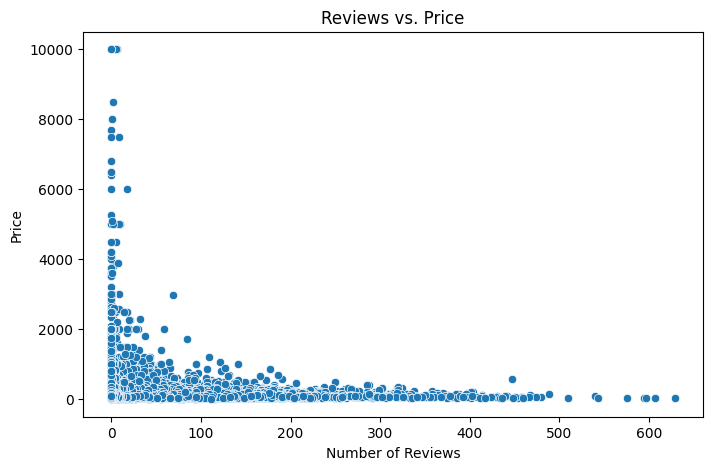

In [ ]:
# Chart - 7 visualization code | Reviews vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['number_of_reviews'], y=df['price'])
plt.title('Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

To check if highly reviewed listings have different pricing.

##### 2. What is/are the insight(s) found from the chart?

No strong correlation, but highly reviewed properties tend to be in moderate price range.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here

#### Chart - 8

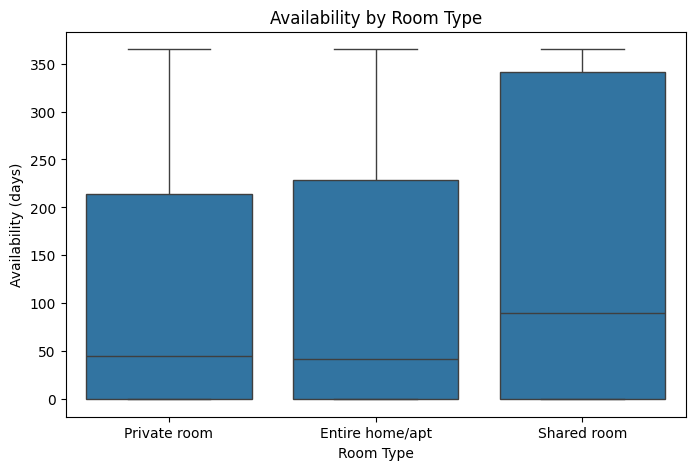

In [ ]:
# Chart - 8 visualization code | Availability by Room Type
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['room_type'], y=df['availability_365'])
plt.title('Availability by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (days)')
plt.show()

##### 1. Why did you pick the specific chart?

To see if different room types have different booking trends.

##### 2. What is/are the insight(s) found from the chart?

Shared rooms tend to be available more days per year.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here

#### Chart - 9

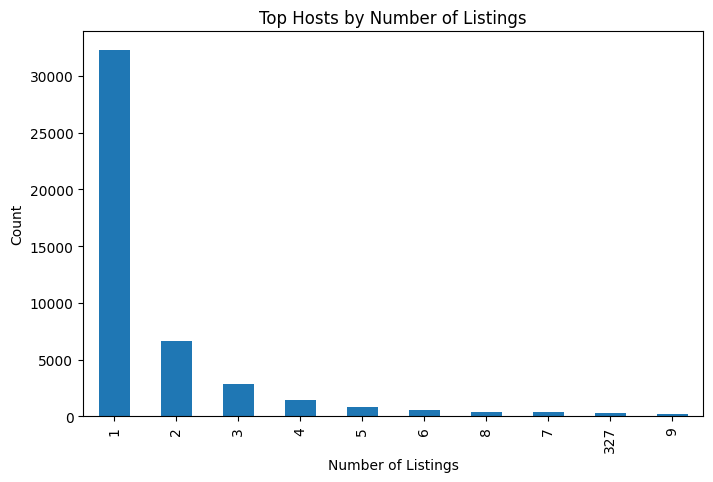

In [ ]:
# Chart - 9 visualization code | Listings per Host
plt.figure(figsize=(8, 5))
df['calculated_host_listings_count'].value_counts().head(10).plot(kind='bar')
plt.title('Top Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

To identify hosts with multiple properties.

##### 2. What is/are the insight(s) found from the chart?

Some hosts have many listings, suggesting professional property management.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***